In [2]:
#Kütüphaneler çağırmak
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization

Using TensorFlow backend.


In [61]:
#Veri seti okumak
df=pd.read_csv("Treatment.csv")

print(df.info())
df.SEX = [1 if each == "M" else 0 for each in df.SEX]

#Define X & Y
y=df.SOURCE.values
x_data=df.drop(["SOURCE"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   int64  
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 284.5 KB
None


In [62]:
#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [63]:
#MLPC score hesaplamak
mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)
print("mlpc score:",mlpc.score(x_test,y_test)) 

mlpc score: 0.7537764350453172


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
#MLPC yi daha iyi sonuç almak için farklı parametreler denemek 
mlpc_2=MLPClassifier(random_state=1,solver="lbfgs", activation="relu")
mlpc_2.fit(x_train,y_train)
print("mlpc_2 score:",mlpc_2.score(x_test,y_test))

mlpc_2 score: 0.7734138972809668


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [65]:
# Modeli geliştirmek
# k_fold

#Veri seti okumak
df=pd.read_csv("Treatment.csv")
df.SEX = [1 if each == "M" else 0 for each in df.SEX]

#Define X & Y
y=df.SOURCE.values
x_data=df.drop(["SOURCE"],axis=1).values

#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="relu")

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

C:\Users\saamm\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7129909365558912


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7341389728096677


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7794561933534743


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7311178247734139


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7280966767371602


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7311178247734139


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7039274924471299


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7492447129909365


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7915407854984894
0.7151515151515152
ortalama score: 0.7376782935091092


C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [66]:
#Grid search

#Veri seti okumak
df=pd.read_csv("Treatment.csv")
df.SEX = [1 if each == "M" else 0 for each in df.SEX]

#Define X & Y
y=df.SOURCE.values
x_data=df.drop(["SOURCE"],axis=1)

#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#model oluşturma
mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["logistic","relu"]}

mlpc=MLPClassifier(random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 19.8min finished
C:\Users\saamm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
print(mlpc_cv_model.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [76]:
mlpc_tuned=MLPClassifier(random_state=1,activation="relu",alpha=0.001,hidden_layer_sizes=(100,100),solver="adam",max_iter=500).fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.7643504531722054


In [42]:
# Modeli değerlendirmek

#Veri seti okumak
df=pd.read_csv("Treatment.csv")
df.SEX = [1 if each == "M" else 0 for each in df.SEX]

#Define X & Y
y=df.SOURCE.values
x_data=df.drop(["SOURCE"],axis=1)

#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1) 

mlpc=MLPClassifier(random_state=1,activation="relu",alpha=0.001,hidden_layer_sizes=(100,100),solver="adam",max_iter=500).fit(x_train,y_train)



In [44]:
#prediction the Y
y_pred=mlpc.predict(x_test)

#confusion_matrix hesaplama
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

#f1_score hesaplama
f1=metrics.f1_score(y_test,y_pred)
print("f1 score:",f1)

[[361  58]
 [ 98 145]]
f1 score: 0.6502242152466368


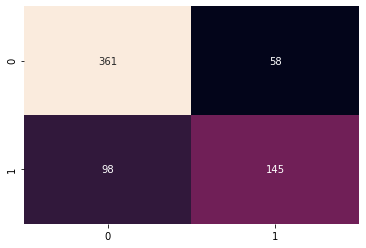

In [96]:
#Seaborn ile cm çizdirimi
sns.heatmap(cm,cbar=False,annot=True,fmt="")

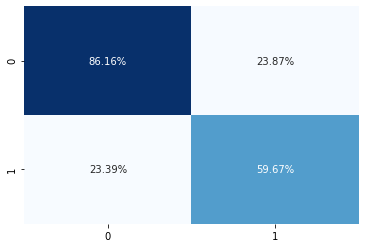

In [97]:
#çizim üzerine değişiklikler
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",fmt=".2%")

In [90]:
#roc and auc

#Define_probs
probs=mlpc.predict_proba(x_test)
probs=probs[:,1]

#auc_values hesaplama için fpr&tpr bulma
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

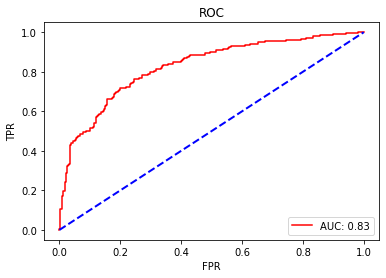

In [91]:
#eğrileri çizmek
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [3]:
#Keras  
#Veri seti okumak
df=pd.read_csv("Treatment.csv")
df.SEX = [1 if each == "M" else 0 for each in df.SEX]

#Define X & Y
y=df.SOURCE.values
x_data=df.drop(["SOURCE"],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,random_state=1)

In [4]:
#Keras modeli olusturma

model=Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='relu'))
model.add(BatchNormalization())


In [5]:
#modeli paketleme

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
egitim=model.fit(x_train,y_train,epochs=50,batch_size=20,validation_data=(x_test,y_test)) 

Train on 2647 samples, validate on 662 samples
Epoch 1/50
2647/2647 [==============================] - 1s 515us/step - loss: 6.8208 - accuracy: 0.1711 - val_loss: 5.6529 - val_accuracy: 0.6299
Epoch 2/50
2647/2647 [==============================] - 1s 191us/step - loss: 6.3240 - accuracy: 0.1904 - val_loss: 4.8531 - val_accuracy: 0.1722
Epoch 3/50
2647/2647 [==============================] - 1s 190us/step - loss: 5.5094 - accuracy: 0.2406 - val_loss: 4.7092 - val_accuracy: 0.2477
Epoch 4/50
2647/2647 [==============================] - 1s 189us/step - loss: 5.1829 - accuracy: 0.3026 - val_loss: 4.5948 - val_accuracy: 0.3127
Epoch 5/50
2647/2647 [==============================] - 1s 197us/step - loss: 4.8155 - accuracy: 0.2958 - val_loss: 4.4184 - val_accuracy: 0.2583
Epoch 6/50
2647/2647 [==============================] - 1s 193us/step - loss: 4.5811 - accuracy: 0.2830 - val_loss: 3.6367 - val_accuracy: 0.3852
Epoch 7/50
2647/2647 [==============================] - 1s 190us/step - loss:

In [7]:
import sklearn.metrics as metrics

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[419   0]
 [243   0]]


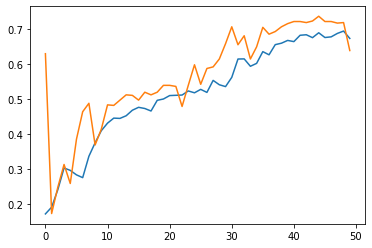

In [8]:
#bizim modelimizin accuracy eğrileri çizmek

plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.show()